# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***. 

👇 Run the cell below to load your preprocessed dataset.

In [1]:
import pandas as pd

# Run this cell if you 
data = pd.read_csv("../data-preprocessing-workflow/data/clean_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarages,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380216,0.375,0.333333,0.500,0.315975,1.0,208500,0.0,0.0,1.0,0.0,0.500000,0.866025
1,-0.312210,0.375,0.333333,0.875,0.068623,1.0,181500,0.0,0.0,1.0,0.0,0.866025,-0.500000
2,0.497682,0.375,0.333333,0.500,0.227273,1.0,223500,0.0,0.0,1.0,0.0,-0.866025,-0.500000
3,0.391036,0.375,0.333333,0.500,0.441968,1.0,140000,0.0,0.0,0.0,1.0,0.500000,0.866025
4,1.134467,0.500,0.333333,0.500,0.566417,1.0,250000,0.0,0.0,1.0,0.0,-0.500000,0.866025


## (1) Correlation investigation

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

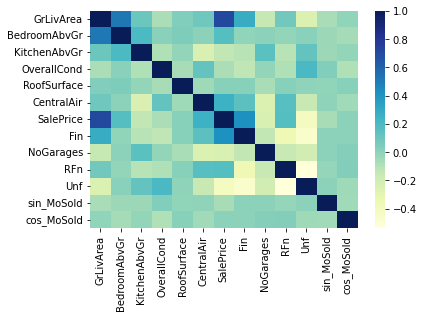

In [3]:
import seaborn as sns

# Heatmap
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu");

❓ Visualize the correlation between column pairs in a dataframe ❓

In [4]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head()

,feature_1,feature_2,correlation
6,GrLivArea,SalePrice,0.707624
78,SalePrice,GrLivArea,0.707624
1,GrLivArea,BedroomAbvGr,0.519338
13,BedroomAbvGr,GrLivArea,0.519338
85,SalePrice,Fin,0.419550


❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [8]:
correlated_features = 0

🧪 **Test your code**

In [9]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/guilhermecavalcantidesabarreto/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/guilhermecavalcantidesabarreto/code/guipyc/data-feature-selection
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_correlation.py::TestCorrelation::test_correlated_features PASSED [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master


In [10]:
!git add tests/correlation.pickle

!git commit -m 'Completed correlation step'

!git push origin master

[master 23e578b] Completed correlation step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/correlation.pickle
Enumerating objects: 18, done.
Counting objects: 100% (18/18), done.
Delta compression using up to 8 threads
Compressing objects: 100% (17/17), done.
Writing objects: 100% (18/18), 7.86 KiB | 3.93 MiB/s, done.
Total 18 (delta 5), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (5/5), done.
To github.com:guipyc/data-feature-selection.git
 * [new branch]      master -> master


## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [14]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

base_model_score = scores.mean()

base_model_score

0.64600925654723

🧪 **Test your code**

In [16]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/guilhermecavalcantidesabarreto/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/guilhermecavalcantidesabarreto/code/guipyc/data-feature-selection
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_base_model.py::TestBase_model::test_base_model_score PASSED   [100%]

============================== 1 passed in 0.18s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master


In [17]:
!git add tests/base_model.pickle

!git commit -m 'Completed base_model step'

!git push origin master

[master 798fb9b] Completed base_model step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/base_model.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 512 bytes | 512.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:guipyc/data-feature-selection.git
   23e578b..798fb9b  master -> master


## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [19]:
import numpy as np
from sklearn.inspection import permutation_importance

model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance

,feature,feature importance
0,GrLivArea,1.017718
1,BedroomAbvGr,0.06513
6,Fin,0.053111
9,Unf,0.021145
2,KitchenAbvGr,0.020167
5,CentralAir,0.016208
7,NoGarages,0.01264
8,RFn,0.012087
10,sin_MoSold,0.001056
3,OverallCond,0.000224


❓ Which feature is the most important ❓

*Save your answer as a `string` under variable name `best_feature`.*

In [20]:
best_feature = importance_df.feature[0]
best_feature

'GrLivArea'

🧪 **Test your code**

In [21]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/guilhermecavalcantidesabarreto/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/guilhermecavalcantidesabarreto/code/guipyc/data-feature-selection
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master


In [22]:
!git add tests/feature_permutation.pickle

!git commit -m 'Completed feature_permutation step'

!git push origin master

[master f5559c1] Completed feature_permutation step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/feature_permutation.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 457 bytes | 457.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:guipyc/data-feature-selection.git
   798fb9b..f5559c1  master -> master


## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one. 
* Save the score under variable name `simplified_model_score`.

<details>
    <summary>💡 Hint</summary>
    
You can try dropping features one by one starting from the ones lowest importance until your model score starts dropping significantly.
</details>

In [23]:
X = X.drop(columns=['RoofSurface','OverallCond','sin_MoSold','cos_MoSold','RFn','NoGarage']) # Drops weak features

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

simplified_model_score = scores.mean()

simplified_model_score

KeyError: "['NoGarage'] not found in axis"

🧪 **Test your code**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())

P.S. Do you remember your score before preprocessing from Challenge #1? How is it different after preprocessing?

🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!